In [1]:
import matplotlib.pyplot as plt # graphing lib
import numpy as np # linear alg.
import pandas as pd # data manipulation
import seaborn as sns # nicer matplot graphs
%matplotlib inline # inline graphs are nice to have

In [2]:
# name columns
name_headers = ['age','workclass','fnlwgt','education','education_num',
         'marital_status','occupation',
         'relationship','race','sex','capital_gain',
         'capital_loss','hours_per_week','native_country','income']
# read data in
df=pd.read_csv('adult.csv',names=name_headers)

In [3]:
df = df.fillna(np.nan)
df = df.applymap(lambda x: np.nan if x=='?' else x)
sns.set(color_codes=True)

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

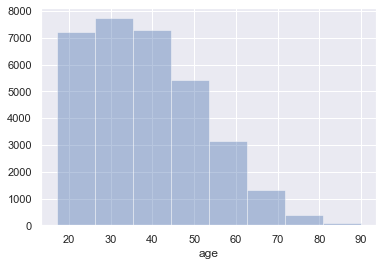

In [5]:
#looking at age distribution
df['age'].value_counts()
sns.distplot(df['age'],bins=8, kde=False)

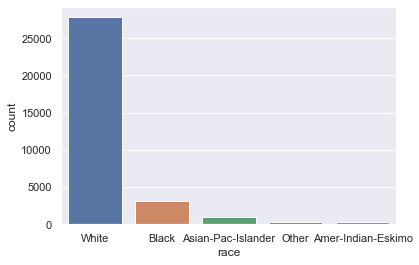

In [6]:
# see race dist, primarily white
df['race'].value_counts()
sns.countplot(df['race'])

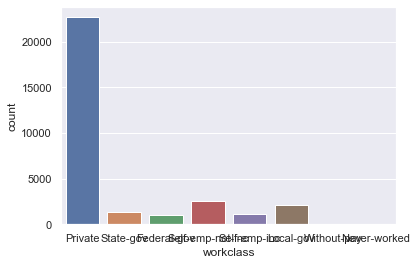

In [7]:
# primarily private sector
df['workclass'].value_counts()
count = sns.countplot(df['workclass'])
# set x axis size later

In [8]:
from sklearn.model_selection import train_test_split,cross_val_score

In [9]:
# map that we want to predict to a binary set of ints (0,1)
df['income_norm']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
#Numeric features
numeric_features = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week','income_norm']
#Categorical features
cat_features = ['workclass','education','marital_status', 'occupation', 'relationship', 'race', 'sex', 'native']

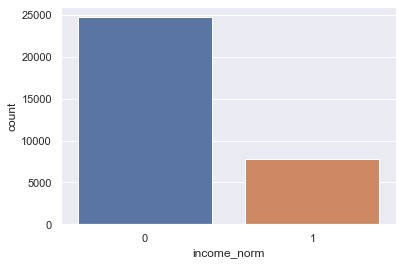

In [10]:
sns.countplot(df['income_norm'])
# we see a large disparity in the data between # of entries

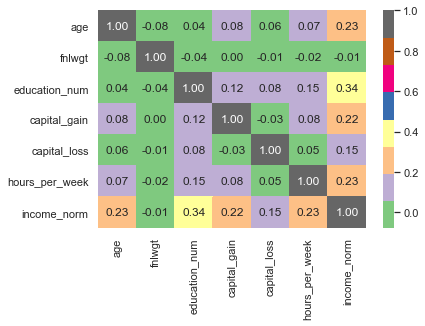

In [11]:
# correlation matrix of features
sns.heatmap(df[numeric_features].corr(), fmt='.2f',cmap='Accent',annot=True)

In [12]:
# data cleaning
df['workclass'] = df['workclass'].fillna('X')
df['occupation'] = df['occupation'].fillna('X')
df['native_country'] = df['native_country'].fillna('United-States')
#check to be sure we have no na
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
income_norm       0
dtype: int64

In [13]:
#Feature engineering
df['sex'] = df['sex'].map({"Male":0,"Female":1})
#df['sex'] = df['sex'].astype(int) # set column as type int
df.drop(labels=['education','occupation','workclass','fnlwgt','relationship','native_country','income','race','marital_status'], axis=1, inplace=True) 
# income is dropped as incorm_norm is used ^

In [14]:
df = df.dropna()
y = df['income_norm'].values
x = df.drop(labels=['income_norm'] ,axis=1) # income is the target
#df.isnull().sum()
# data splitting
X_train,X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,train_size=0.8,random_state = 42)

In [27]:
# sklearn imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [17]:
classifiers = []
classifiers.append(LogisticRegression(solver='lbfgs'))
classifiers.append(KNeighborsClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(GaussianNB())
classifiers.append(RandomForestClassifier(n_estimators=100,max_features=3))
classifiers.append(SVC())

In [18]:
X_train.head()

,age,education_num,sex,capital_gain,capital_loss,hours_per_week
5514,26,9,0,0,0,25
19777,24,9,1,0,0,35
10781,36,13,1,0,0,40
32240,22,10,1,0,0,20
9876,31,13,0,0,0,40


In [19]:
results=[]
for clf in classifiers:
    cross_val = cross_val_score(clf,X_train,Y_train,scoring='accuracy',cv=5,n_jobs=-1)
    results.append(cross_val)
    #print("Mean: ",cross_val.mean(),"Standard Dev: ",cross_val.std()*2)
    print("Accuracy: %0.2f (+/- %0.2f)" % (cross_val.mean(), cross_val.std() * 2))

Accuracy: 0.81 (+/- 0.02)
Accuracy: 0.82 (+/- 0.00)
Accuracy: 0.81 (+/- 0.01)
Accuracy: 0.80 (+/- 0.01)
Accuracy: 0.82 (+/- 0.00)
Accuracy: 0.82 (+/- 0.01)
